In [1]:
#Lab 2 - In this lab, we will practice important concepts covered in the past few lessons.
#You will need to complete two parts:
#Part I: Build and compare regression models 
#Part II: Build a classificaiton model

#Please ask for help if you are stuck at any point during the execution of the instructions below!

#When you are done, let the instructor know so that you can get quick feedback before your final submission
#Please do not forget to upload the final version of this notebook to the Dropbox folder for Lab 2

#Most importantly, HAVE FUN!

In [2]:
#Part I  : Polynomial Regression

#always import numpy because you will likely need it.
import numpy as np

#import pandas library to use data series and data frames
import pandas as pd

#import matplotlib.pyplot so that you can plot some data
import matplotlib.pyplot as plt

In [3]:
#This fictional dataset represents the growth rates of a type of bacteria as a function of time
#Use this data as is 
bacteriaGrowth = np.array([
    [0,0],
    [60,120],
    [120,250],
    [180,380],
    [240,500],
    [300,700],
    [360,1000],
    [420,1400],
    [480,2200],
    [540,3400],
    [600,4800],
    [660,6000]
    ])

#now create a pandas dataframe to put the data
dataset = pd.DataFrame(bacteriaGrowth,columns=['Time in Seconds','Number of Bacteria'])
features = pd.DataFrame(dataset,columns=["Time in Seconds"])
target = pd.DataFrame(dataset,columns=["Number of Bacteria"])

#inspect the dataframe
print(dataset.shape)
print(dataset.info)
print(dataset.dtypes)
print(type(dataset))

(12, 2)
<bound method DataFrame.info of     Time in Seconds  Number of Bacteria
0                 0                   0
1                60                 120
2               120                 250
3               180                 380
4               240                 500
5               300                 700
6               360                1000
7               420                1400
8               480                2200
9               540                3400
10              600                4800
11              660                6000>
Time in Seconds       int32
Number of Bacteria    int32
dtype: object
<class 'pandas.core.frame.DataFrame'>


In [4]:
#Assign your x as the first column
x = features
#Assign your y as the second column
y = target

In [5]:
print(x)
print(y)

    Time in Seconds
0                 0
1                60
2               120
3               180
4               240
5               300
6               360
7               420
8               480
9               540
10              600
11              660
    Number of Bacteria
0                    0
1                  120
2                  250
3                  380
4                  500
5                  700
6                 1000
7                 1400
8                 2200
9                 3400
10                4800
11                6000


In [6]:
#inspect x
print(x.shape)
print(x.dtypes)
print(type(x))

(12, 1)
Time in Seconds    int32
dtype: object
<class 'pandas.core.frame.DataFrame'>


In [7]:
#inspect y
print(y.shape)
print(y.dtypes)
print(type(y))

(12, 1)
Number of Bacteria    int32
dtype: object
<class 'pandas.core.frame.DataFrame'>


In [8]:
#Use linear regression to build a predictive model
#import the linear model package from sklearn
import sklearn.linear_model as lm
#build the model with x, y
linearmodel=lm.LinearRegression()
regressionModel = linearmodel.fit(x,y)

In [9]:
#use the score method to see how good the fit is
print(regressionModel.coef_)
print(regressionModel.intercept_)
print(regressionModel.score(x,y))

[[8.29079254]]
[-1006.79487179]
0.8138234411093247


In [10]:
#predict - don't split into training and test - just predict with x
predictedY = regressionModel.predict(x)
predictedY

array([[-1006.79487179],
       [ -509.34731935],
       [  -11.8997669 ],
       [  485.54778555],
       [  982.995338  ],
       [ 1480.44289044],
       [ 1977.89044289],
       [ 2475.33799534],
       [ 2972.78554779],
       [ 3470.23310023],
       [ 3967.68065268],
       [ 4465.12820513]])

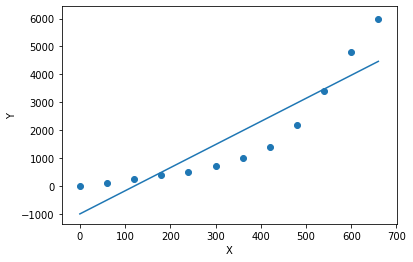

In [11]:
#using the plot function, visualize the dataset and Linear Regression results 
plt.plot(x,predictedY)
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [12]:
### CHECKPOINT 1 ###
#Before you proceed, make sure you have a score and a visual plot showing the results.
#If not, this means the data was not used properly.
#If you are stuck - ask for help before you proceed! 

In [13]:
#Now, let's try to build a predctive model using ploynomial regression
import sklearn.preprocessing as prep


#we need to extract the polynomial features of the data using a second degree polynomial and fit the data
poly = prep.PolynomialFeatures(degree=2)
xPoly = poly.fit_transform(x)
poly.fit(xPoly,y)

lin2 = lm.LinearRegression()
lin2.fit(xPoly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#use the score method to see how good the fit is
lin2.score(xPoly,y)

0.9840668815096588

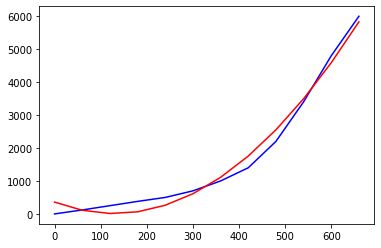

In [15]:
#using the plot function, visualize the dataset and polynomial Regression results and
plt.plot(x,y,color='blue')
plt.plot(x,lin2.predict(xPoly),color='red')

In [16]:
#Use the same polynomial regression but now with a third degree
poly3 = prep.PolynomialFeatures(degree=3)
xPoly = poly3.fit_transform(x)
poly3.fit(xPoly,y)

lin3 = lm.LinearRegression()
lin3.fit(xPoly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#use the score method to see how good the fit is with a third degree polynomial
lin3.score(xPoly,y)

0.9966681314401232

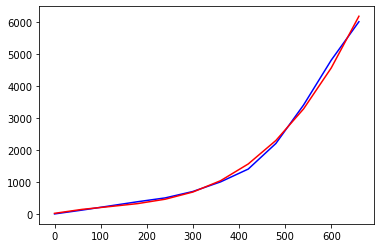

In [18]:
#using the plot function, visualize the dataset and polynomial Regression results
plt.plot(x,y,color='blue')
plt.plot(x,lin3.predict(xPoly),color='red')

In [19]:
#What observations can you make about the different models you used to build 
#a regression model for this dataset (linear, polynomial of the second degree, polynomial of the third degree)

#The simple linear regression was accurate, but it was obvious that it would not be very effective based on the 
#visualization.  Beyond any of the extremese the linear model would break down

#The 2nd degree polynomial worked, but it also had some issues because it's noticeable again that at the extremes
#of the time variable it is obvious the model would show some erroneus predictions

#The 3rd degree is very close to a perfect fit, and seems to hit the closest of all three.

In [20]:
### CHECKPOINT 3 ###
#Before you proceed, make sure you have built three regression models, scored them and plotted all of them.
#If not, this means Part I of this lab has not been completed. 
#If you are stuck - ask for help before you proceed! 

In [21]:
#Part II : Classification

#For this part of the lab, we are going to use the sklearn Breast Cancer dataset
#Read about it more here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

#import the dataset package from sklearn
import sklearn.datasets as datasets

#load the Breast Cancer data using the load_ function (not a csv import)
cancerData = datasets.load_breast_cancer()

In [22]:
#Print the DESCR attribute to explore the dataset at a high level
print(cancerData.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [23]:
#inspect the features
print(cancerData.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [24]:
#inspect the target classes
print(cancerData.target_names)
print(cancerData.target)

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [25]:
#define the features and the target
features = pd.DataFrame(cancerData.data, columns=cancerData.feature_names)
target = pd.DataFrame(cancerData.target)

In [26]:
#sneak peeak at the first few rows of the features to make sure all the values are numeric
features.head()
features = features.iloc[:,:10]
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [27]:
#sneak peeak at the first few rows of the target to make sure all the values are numeric
target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [28]:
#Put the following 3 features in x: 'mean radius','mean texture','mean symmetry'
x = features[["mean radius", "mean texture", "mean symmetry"]]
#store target in y
y = target[0]

In [29]:
#Split the dataset into training and testing using 30% of data for testing
import sklearn.model_selection as ms
xTrain, xTest, yTrain, yTest = ms.train_test_split(x, y, test_size=0.3)

In [30]:
#Use a KNN Classifier with 1 neighbor
import sklearn.neighbors as neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(xTrain,yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [31]:
#inspect the classes to make sure you only have 0 and 1
knn.classes_

array([0, 1])

In [32]:
#use the model to predict new datapoints
yPredicted = knn.predict(xTest)

In [33]:
#Use the metric package to get the accuracy score of this classification model
import sklearn.metrics as metrics
metrics.accuracy_score(yTest,yPredicted)

0.8713450292397661

In [34]:
#inspect the confusion matrix
metrics.confusion_matrix(yTest,yPredicted)

array([[52, 12],
       [10, 97]], dtype=int64)

In [35]:
#How do you interpret this confusion matrix?

#44 times the predictive model guessed correctly that malignant tumors were malignant.  98 times the predictive model 
# guessed correctly that benign tumors were benign.  The accuracy is 83%.
(44+98)/(44+11+18+98)

0.8304093567251462

In [36]:
### CHECKPOINT 4 ###
#Before you proceed, make sure you have built a classification model and obtained its accuracy score and the confusion matrix
#If not, this means Part II of this lab has not been completed. 
#If you are stuck - ask for help before you proceed! 

In [37]:
#Go further! 
#Experiment with different subset of features or/and k-values to see if you can get an accuracy score greater than 0.9 

# Let's first use the existing features, but test different k-values
scores=[]
for k in range(1,10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(xTrain, yTrain)
    yPredicted=knn.predict(xTest)
    scores.append(metrics.accuracy_score(yTest,yPredicted))
    print(k,metrics.accuracy_score(yTest,yPredicted))

1 0.8713450292397661
2 0.8596491228070176
3 0.8888888888888888
4 0.8771929824561403
5 0.8771929824561403
6 0.8947368421052632
7 0.8888888888888888
8 0.8947368421052632
9 0.8830409356725146


In [38]:
#store target in y
y = target[0]
#Now let's test all the features individually and all the KNN values together...
for element in features:
    print(element)
    x = features[[element]]
    scores=[]
    xTrain, xTest, yTrain, yTest = ms.train_test_split(x, y, test_size=0.3)
    for k in range(1,10):
        knn = neighbors.KNeighborsClassifier(n_neighbors=k)
        knn.fit(xTrain, yTrain)
        yPredicted=knn.predict(xTest)
        scores.append(metrics.accuracy_score(yTest,yPredicted))
        print(k,metrics.accuracy_score(yTest,yPredicted))


mean radius
1 0.8128654970760234
2 0.7719298245614035
3 0.8362573099415205
4 0.8187134502923976
5 0.8538011695906432
6 0.8362573099415205
7 0.8654970760233918
8 0.8596491228070176
9 0.8830409356725146
mean texture
1 0.6257309941520468
2 0.5497076023391813
3 0.5789473684210527
4 0.5730994152046783
5 0.6432748538011696
6 0.6608187134502924
7 0.7017543859649122
8 0.6900584795321637
9 0.7076023391812866
mean perimeter
1 0.7777777777777778
2 0.7251461988304093
3 0.8596491228070176
4 0.8187134502923976
5 0.8713450292397661
6 0.847953216374269
7 0.847953216374269
8 0.8362573099415205
9 0.8362573099415205
mean area
1 0.8304093567251462
2 0.8128654970760234
3 0.8771929824561403
4 0.8713450292397661
5 0.8888888888888888
6 0.8771929824561403
7 0.8888888888888888
8 0.8713450292397661
9 0.9005847953216374
mean smoothness
1 0.631578947368421
2 0.6257309941520468
3 0.6900584795321637
4 0.6374269005847953
5 0.6608187134502924
6 0.6081871345029239
7 0.6374269005847953
8 0.6257309941520468
9 0.637426900

In [39]:
#store target in y
oldscore = 0
newscore = 0
y = target[0]
for element1 in features:
    for element2 in features:
        if element2 == element1:
            pass
        else:
            print(element2, element1)
            x = features[[element2, element1]]
            scores=[]
            xTrain, xTest, yTrain, yTest = ms.train_test_split(x, y, test_size=0.3)
            for k in range(1,10):
                knn = neighbors.KNeighborsClassifier(n_neighbors=k)
                knn.fit(xTrain, yTrain)
                yPredicted=knn.predict(xTest)
                newscore = metrics.accuracy_score(yTest,yPredicted)
                if newscore > oldscore:
                    print("NEW BEST SCORE")
                    print(newscore)
                    oldscore = metrics.accuracy_score(yTest,yPredicted)
                    scores.append(metrics.accuracy_score(yTest,yPredicted))
                    print(k,metrics.accuracy_score(yTest,yPredicted))

mean texture mean radius
NEW BEST SCORE
0.8771929824561403
1 0.8771929824561403
NEW BEST SCORE
0.8888888888888888
5 0.8888888888888888
NEW BEST SCORE
0.9064327485380117
6 0.9064327485380117
NEW BEST SCORE
0.9122807017543859
9 0.9122807017543859
mean perimeter mean radius
mean area mean radius
mean smoothness mean radius
mean compactness mean radius
mean concavity mean radius
mean concave points mean radius
mean symmetry mean radius
mean fractal dimension mean radius
mean radius mean texture
mean perimeter mean texture
NEW BEST SCORE
0.935672514619883
3 0.935672514619883
NEW BEST SCORE
0.9415204678362573
4 0.9415204678362573
NEW BEST SCORE
0.9473684210526315
5 0.9473684210526315
mean area mean texture
mean smoothness mean texture
mean compactness mean texture
mean concavity mean texture
mean concave points mean texture
mean symmetry mean texture
mean fractal dimension mean texture
mean radius mean perimeter
mean texture mean perimeter
mean area mean perimeter
mean smoothness mean perime

In [40]:
oldscore
#the best was 0.9590 which was mean_perimeter and mean_texture and 3 nearest_neighbors

0.9473684210526315

In [41]:
oldscore = 0
newscore = 0
y = target[0]
for element1 in features:
    for element2 in features:
        for element3 in features:
            if element2 == element1 or element3 == element1 or element2 == element3:
                pass
            else:
                x = features[[element3, element2, element1]]
                scores=[]
                xTrain, xTest, yTrain, yTest = ms.train_test_split(x, y, test_size=0.3)
                for k in range(1,10):
                    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
                    knn.fit(xTrain, yTrain)
                    yPredicted=knn.predict(xTest)
                    newscore = metrics.accuracy_score(yTest,yPredicted)
                    if newscore > oldscore:
                        print(element3, element2, element1)
                        print("NEW BEST SCORE")
                        print(newscore)
                        oldscore = metrics.accuracy_score(yTest,yPredicted)
                        scores.append(metrics.accuracy_score(yTest,yPredicted))
                        print(k,metrics.accuracy_score(yTest,yPredicted))

mean perimeter mean texture mean radius
NEW BEST SCORE
0.8538011695906432
1 0.8538011695906432
mean perimeter mean texture mean radius
NEW BEST SCORE
0.8654970760233918
2 0.8654970760233918
mean perimeter mean texture mean radius
NEW BEST SCORE
0.8713450292397661
5 0.8713450292397661
mean area mean texture mean radius
NEW BEST SCORE
0.8771929824561403
5 0.8771929824561403
mean area mean texture mean radius
NEW BEST SCORE
0.8947368421052632
7 0.8947368421052632
mean concave points mean texture mean radius
NEW BEST SCORE
0.9064327485380117
1 0.9064327485380117
mean texture mean perimeter mean radius
NEW BEST SCORE
0.9532163742690059
3 0.9532163742690059
mean perimeter mean texture mean concavity
NEW BEST SCORE
0.9590643274853801
3 0.9590643274853801
mean concave points mean compactness mean concavity
NEW BEST SCORE
0.9649122807017544
7 0.9649122807017544


In [42]:
oldscore
#the best was 0.9649 which was mean_concave_points, mean_compactness, and mean_concavity, with 7 k-nearest neigbours

0.9649122807017544